# Principais linguagens de programação de acordo com o GitHub
Estudos realizados utilizando as bibliotecas Pandas para análise de dados e matplotlib.pyplot para gerar os gráficos das principais linguagens de programação do GitHub. Dados obtidos pelo site:https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [54]:
# df = pd.read_csv('QueryResults.csv')
# df.columns = ['DATE', 'TAG', 'POSTS']
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [55]:
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,507
4,2008-08-01 00:00:00,c++,163
...,...,...,...
2253,2022-02-01 00:00:00,php,3887
2254,2022-02-01 00:00:00,python,23136
2255,2022-02-01 00:00:00,r,4393
2256,2022-02-01 00:00:00,ruby,464


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [56]:
df.count()

DATE     2258
TAG      2258
POSTS    2258
dtype: int64

**Challenge**: Count the number of entries in each column of the dataframe

In [14]:
df.count()

DATE     2258
TAG      2258
POSTS    2258
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [23]:
most_popular_sorted = df.sort_values(['POSTS'], ascending=False)
most_popular_sorted

pandas.core.groupby.generic.DataFrameGroupBy

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [68]:
group_by_tag = df.groupby("TAG")
# print(group_by_tag.count().idxmin())
# print(group_by_tag.count().sort_values(['POSTS']))
print(group_by_tag.count())
print(group_by_tag.sum().sort_values(['POSTS'], ascending=False))

# group_by_posts = df.groupby("")
# print(group_by_posts.count())

            DATE  POSTS
TAG                    
assembly     163    163
c            163    163
c#           164    164
c++          163    163
delphi       163    163
go           148    148
java         163    163
javascript   163    163
perl         163    163
php          163    163
python       163    163
r            161    161
ruby         163    163
swift        155    155
              POSTS
TAG                
javascript  2336475
python      1892047
java        1826941
c#          1522914
php         1427452
c++          754876
r            437297
c            374536
swift        308853
ruby         222907
perl          66448
go            59534
delphi        49274
assembly      39630


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [84]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [85]:
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,507
4,2008-08-01,c++,163
...,...,...,...
2253,2022-02-01,php,3887
2254,2022-02-01,python,23136
2255,2022-02-01,r,4393
2256,2022-02-01,ruby,464


## Data Manipulation



In [91]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,507
4,2008-08-01,c++,163


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [95]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [106]:
# pivoted_df = test_df.pivot(index="Age", columns="Actor", values="Power")
# pivoted_df

reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
reshaped_df.fillna(0, inplace=True)
reshaped_df.go


DATE
2008-07-01      0.0
2008-08-01      0.0
2008-09-01      0.0
2008-10-01      0.0
2008-11-01      0.0
              ...  
2021-10-01    761.0
2021-11-01    705.0
2021-12-01    772.0
2022-01-01    796.0
2022-02-01    704.0
Name: go, Length: 164, dtype: float64

In [98]:
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,507
4,2008-08-01,c++,163
...,...,...,...
2253,2022-02-01,php,3887
2254,2022-02-01,python,23136
2255,2022-02-01,r,4393
2256,2022-02-01,ruby,464


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

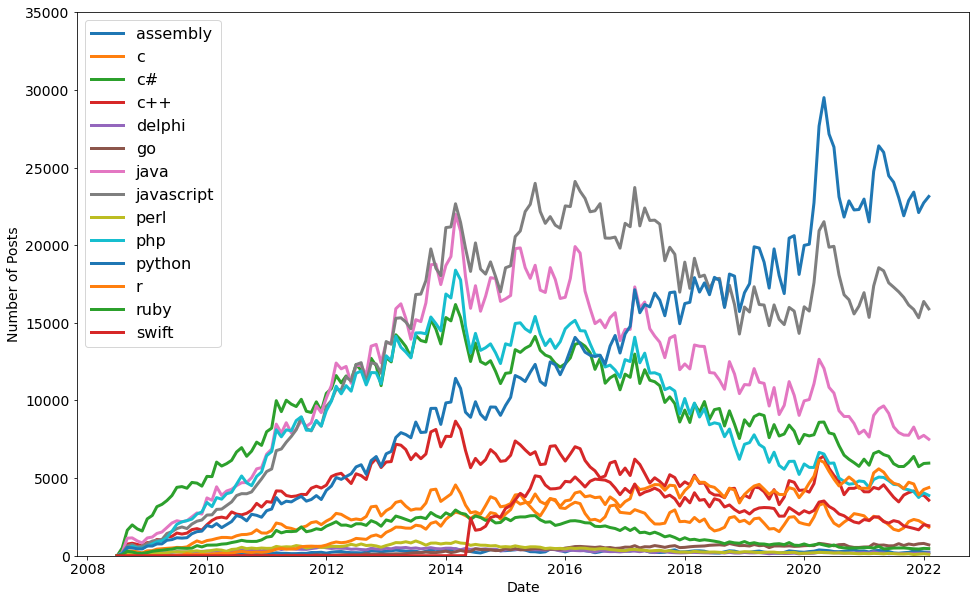

In [144]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
    
plt.legend(fontsize=16)


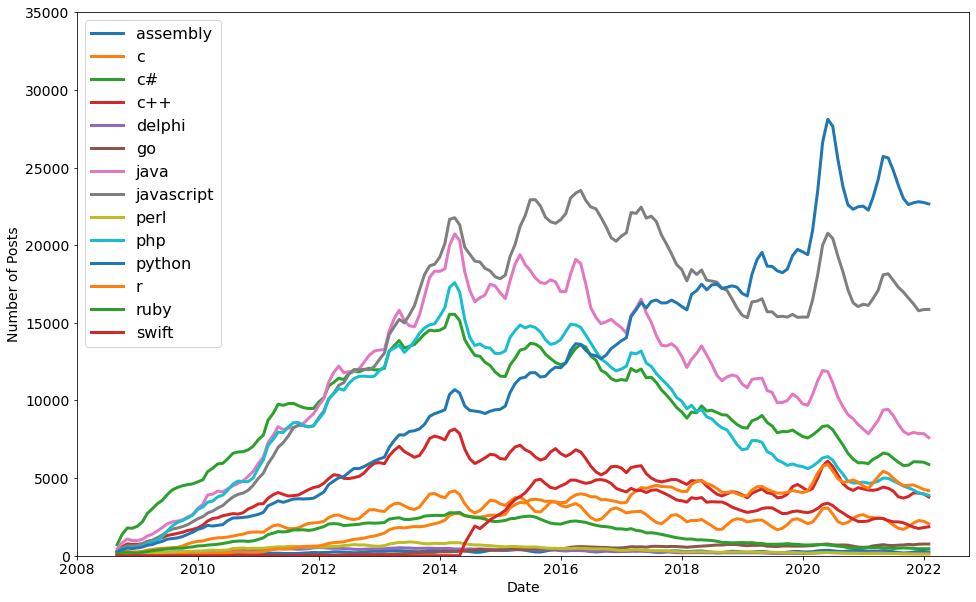

In [155]:
roll_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
    
plt.legend(fontsize=16)



**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 